## Limpieza de Datos

In [2]:
import pandas as pd
import glob

# Cargar los archivos de un directorio
archivos = glob.glob('./Data/*.csv')

# Crear lista para muestras
muestras = []

# Iterar cada archivo para sacar una muestra aleatoria
for archivo in archivos:
    data = pd.read_csv(archivo)
    
    muestra = data.sample(frac=0.2)  
    muestras.append(muestra)

# Concatenar las muestras
muestra_concatenada = pd.concat(muestras, ignore_index=True)

# Guardar la muestra concatenada
muestra_concatenada.to_csv('./Data.csv', index=False)


C:\Users\denis\AppData\Local\Temp\ipykernel_19768\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_19768\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_19768\1196747608.py:12: DtypeWarning: Columns (2,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_19768\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Users\denis\AppData\Local\Temp\ipykernel_19768\1196747608.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(archivo)
C:\Use

In [28]:
# Leer el archivo   
df = pd.read_csv('Data.csv')

# Forma del dataframe
df.shape

C:\Users\denis\AppData\Local\Temp\ipykernel_19768\3800025677.py:2: DtypeWarning: Columns (2,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data.csv')


(1683090, 10)

In [29]:
# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683090 entries, 0 to 1683089
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Genero_Usuario         1683090 non-null  object
 1   Edad_Usuario           1683090 non-null  int64 
 2   Bici                   1683090 non-null  object
 3   Ciclo_Estacion_Retiro  1683090 non-null  int64 
 4   Fecha_Retiro           1683090 non-null  object
 5   Hora_Retiro            1683090 non-null  object
 6   Ciclo_Estacion_Arribo  1683090 non-null  object
 7   Fecha_Arribo           1683090 non-null  object
 8   Hora_Arribo            1683090 non-null  object
 9   Unnamed: 9             1 non-null        object
dtypes: int64(2), object(8)
memory usage: 128.4+ MB


In [30]:
# Revision de columnas 9 
df.iloc[:, 9]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1683085    NaN
1683086    NaN
1683087    NaN
1683088    NaN
1683089    NaN
Name: Unnamed: 9, Length: 1683090, dtype: object

In [31]:
# Eliminación de columnas 9 
df.drop(df.columns[9], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683090 entries, 0 to 1683089
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Genero_Usuario         1683090 non-null  object
 1   Edad_Usuario           1683090 non-null  int64 
 2   Bici                   1683090 non-null  object
 3   Ciclo_Estacion_Retiro  1683090 non-null  int64 
 4   Fecha_Retiro           1683090 non-null  object
 5   Hora_Retiro            1683090 non-null  object
 6   Ciclo_Estacion_Arribo  1683090 non-null  object
 7   Fecha_Arribo           1683090 non-null  object
 8   Hora_Arribo            1683090 non-null  object
dtypes: int64(2), object(7)
memory usage: 115.6+ MB


In [32]:
# Revision de datos nulos 
df.isnull().sum()

Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_Estacion_Arribo    0
Fecha_Arribo             0
Hora_Arribo              0
dtype: int64

In [33]:
# Revision de los primeros 5 registros
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,32,4114,104,23/01/2019,10:06:47,93,23/01/2019,10:13:53
1,M,33,9024,311,23/01/2019,8:40:00,25,23/01/2019,8:56:50
2,M,29,9458,31,31/01/2019,17:58:04,165,31/01/2019,18:14:01
3,F,39,15107,296,31/01/2019,8:24:16,33,31/01/2019,8:47:07
4,M,31,3353,398,09/01/2019,17:06:46,389,09/01/2019,17:14:55


In [34]:
print(df['Hora_Retiro'])

0          10:06:47
1           8:40:00
2          17:58:04
3           8:24:16
4          17:06:46
             ...   
1683085    12:06:31
1683086    10:43:10
1683087    18:35:40
1683088    20:11:59
1683089    18:07:45
Name: Hora_Retiro, Length: 1683090, dtype: object


In [ ]:
# Transformación de fechas y horas 
df['Fecha_Retiro'] = pd.to_datetime(df['Fecha_Retiro'], format='%d/%m/%Y')

df['Hora_Retiro'] = df['Hora_Retiro'].str.replace('::', ':00:00')
df['Hora_Retiro'] = pd.to_timedelta(df['Hora_Retiro'] )
df['Hora_Retiro'] = df['Hora_Retiro'].dt.components.apply(
    lambda x: f"{x.hours:02}:{x.minutes:02}:{x.seconds:02}", axis=1
)


df['Hora_Arribo'] = df['Hora_Arribo'].str.replace('::', ':00:00')
df['Hora_Arribo'] = pd.to_timedelta(df['Hora_Arribo'])
df['Hora_Arribo'] = df['Hora_Arribo'].dt.components.apply(
    lambda x: f"{x.hours:02}:{x.minutes:02}:{x.seconds:02}", axis=1
)


df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,32,4114,104,2019-01-23,10:06:47,93,23/01/2019,10:13:53
1,M,33,9024,311,2019-01-23,08:40:00,25,23/01/2019,08:56:50
2,M,29,9458,31,2019-01-31,17:58:04,165,31/01/2019,18:14:01
3,F,39,15107,296,2019-01-31,08:24:16,33,31/01/2019,08:47:07
4,M,31,3353,398,2019-01-09,17:06:46,389,09/01/2019,17:14:55


In [43]:
df['Fecha_Arribo'] = pd.to_datetime(df['Fecha_Arribo'], format='%d/%m/%Y', errors='coerce')

df = df.dropna(subset=['Fecha_Arribo'])
df.head()


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,32,4114,104,2019-01-23,10:06:47,93,2019-01-23,10:13:53
1,M,33,9024,311,2019-01-23,08:40:00,25,2019-01-23,08:56:50
2,M,29,9458,31,2019-01-31,17:58:04,165,2019-01-31,18:14:01
3,F,39,15107,296,2019-01-31,08:24:16,33,2019-01-31,08:47:07
4,M,31,3353,398,2019-01-09,17:06:46,389,2019-01-09,17:14:55


In [44]:
# Exploración de datos generales 

# Genero
print(df['Genero_Usuario'].unique())

# Edad
print(sorted(df['Edad_Usuario'].unique()))


['M' 'F']
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 97, 118, 119]


## Visualización

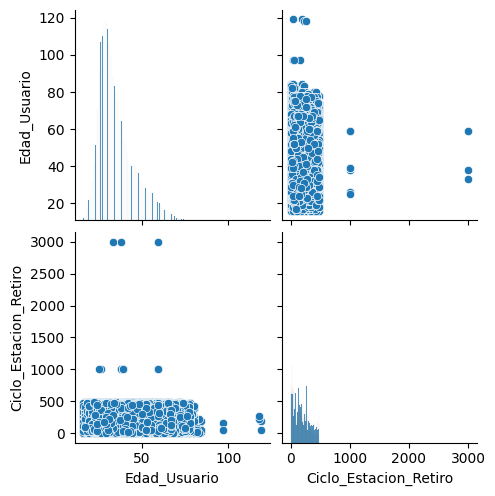

In [48]:
# Histogramas 
import seaborn as sns
import matplotlib.pyplot as plt

df_vis = df[['Edad_Usuario', 'Genero_Usuario', 'Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']]
sns.pairplot(df_vis)



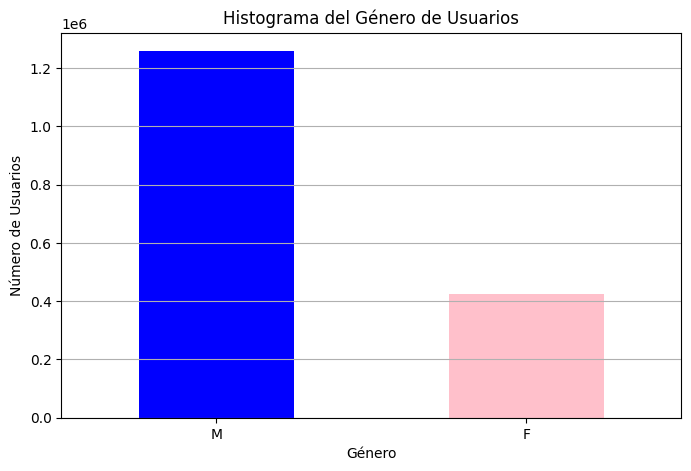

In [49]:
# Histograma genero 
plt.figure(figsize=(8, 5))
df['Genero_Usuario'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Histograma del Género de Usuarios')
plt.xlabel('Género')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()


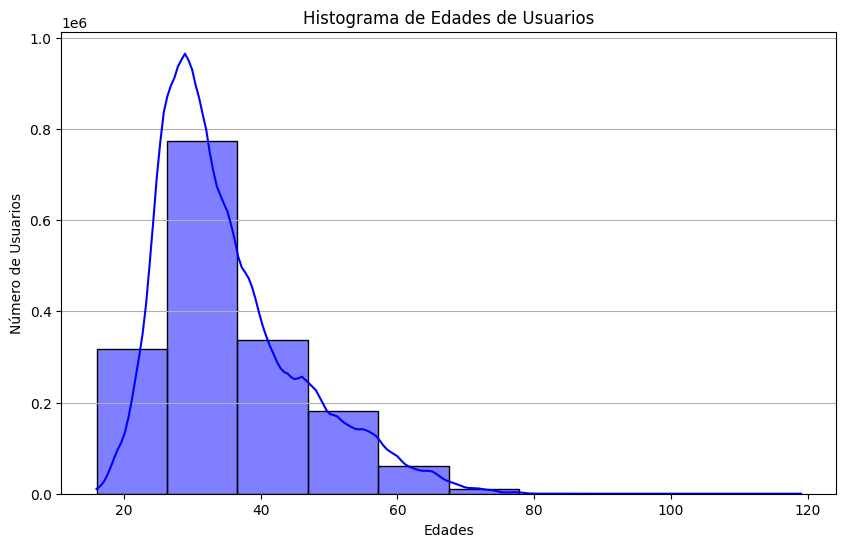

In [50]:
# Histograma de edades

plt.figure(figsize=(10, 6))

sns.histplot(df['Edad_Usuario'], bins=10, kde=True, color='blue')
plt.title('Histograma de Edades de Usuarios')
plt.xlabel('Edades')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()

In [51]:
# Dectar outliers de edad 
import numpy as np

# Calcular el rango intercuartílico
Q1 = df['Edad_Usuario'].quantile(0.25)  
Q3 = df['Edad_Usuario'].quantile(0.75) 
IQR = Q3 - Q1 

# Definir los límites 
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar los outliers
outliers = df[(df['Edad_Usuario'] < limite_inferior) | (df['Edad_Usuario'] > limite_superior)]
print(f"Outliers detectados:\n{outliers}")

# Eliminar outliers
df = df[(df['Edad_Usuario'] >= limite_inferior) & (df['Edad_Usuario'] <= limite_superior)]


Outliers detectados:
        Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro  \
37                   M            72  12034                     75   
40                   M            68  10073                    347   
71                   M            61  10577                     99   
95                   M            66  12509                    278   
96                   M            75   1493                    334   
...                ...           ...    ...                    ...   
1682941              F            61   3066                     79   
1682979              M            76  15143                    260   
1683005              M            75   7509                     77   
1683052              M            59  10070                    440   
1683077              M            67  11190                    119   

        Fecha_Retiro Hora_Retiro Ciclo_Estacion_Arribo Fecha_Arribo  \
37        2019-01-04    08:57:59                    84   2019-01-04

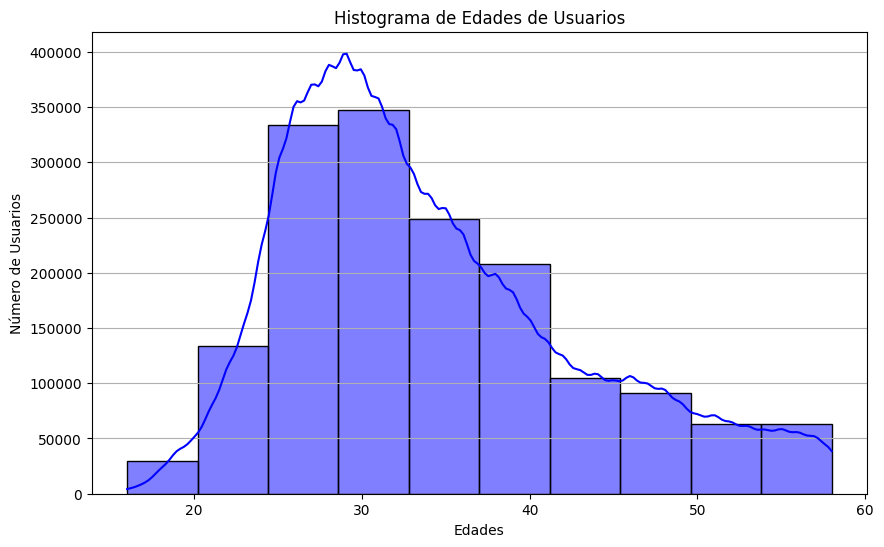

In [52]:
# Histograma de edades (sin outliers)

df_vis = df[['Edad_Usuario', 'Genero_Usuario', 'Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']]

plt.figure(figsize=(10, 6))

sns.histplot(df['Edad_Usuario'], bins=10, kde=True, color='blue')
plt.title('Histograma de Edades de Usuarios')
plt.xlabel('Edades')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()


In [53]:
print(df['Edad_Usuario'].min())
print(df['Edad_Usuario'].max())

16
58


## Data con estaciones


In [ ]:
df_estaciones = pd.read_csv('stations.csv')

df_estaciones.rename(columns={'id': 'Ciclo_Estacion_Retiro'}, inplace=True)

df_final = pd.merge(df, df_estaciones, on='Ciclo_Estacion_Retiro', how='left')

print(df_final.head())


  Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M            32   4114                    104   2019-01-23   
1              M            33   9024                    311   2019-01-23   
2              M            29   9458                     31   2019-01-31   
3              F            39  15107                    296   2019-01-31   
4              M            31   3353                    398   2019-01-09   

  Hora_Retiro Ciclo_Estacion_Arribo Fecha_Arribo Hora_Arribo        lat  \
0    10:06:47                    93   2019-01-23    10:13:53  19.427059   
1    08:40:00                    25   2019-01-23    08:56:50  19.393665   
2    17:58:04                   165   2019-01-31    18:14:01  19.427838   
3    08:24:16                    33   2019-01-31    08:47:07  19.394283   
4    17:06:46                   389   2019-01-09    17:14:55  19.371030   

         lon                                        name  
0 -99.137116         104 SA